<a href="https://colab.research.google.com/github/emilyhunter630/labs/blob/main/Hunter_HedonicPricingLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('cars_hw.csv')

#overview of data structure
print("Data Info:")
print(data.info())  #shows data types and missing values
print("\nSummary Statistics:")
print(data.describe())  #summary stats for numerical columns

#check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB
None

Summary Statistics:
       Unnamed: 0    Make_Year   Mileage_Run  Seating_Capacity         Price
count  976.000000   976.000000    976.000000        976.000000  9.760000

In [4]:
data.fillna(data.select_dtypes(include=np.number).mean(), inplace=True)
#fill missing numerical values with the mean

In [5]:
#fill missing values in categorical columns with the mode
for column in data.select_dtypes(include='object').columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

<ipython-input-5-92a07addd5ad>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


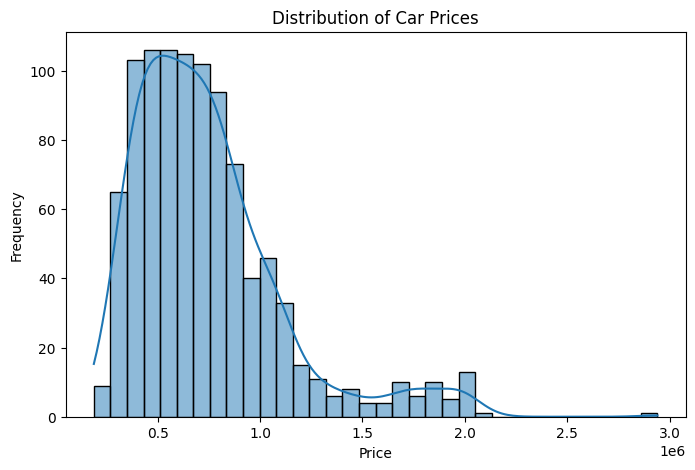

In [6]:
#distribution of the target variable 'Price'
plt.figure(figsize=(8, 5))
sns.histplot(data['Price'], kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

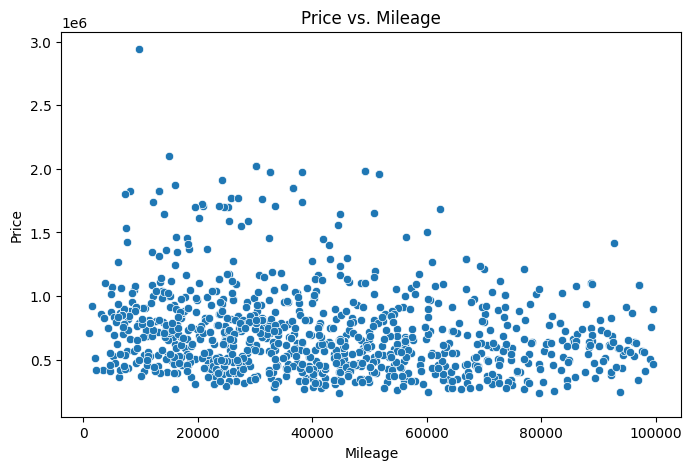

In [8]:
#scatter plot of 'Price' vs. 'Mileage'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Mileage_Run', y='Price', data=data)
plt.title("Price vs. Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

2. Transform variables

In [10]:
#identify categorical columns and encode them
categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

#check transformed data
print(data_encoded.head())

   Unnamed: 0  Make_Year  Mileage_Run  Seating_Capacity   Price  Make_Datsun  \
0           1       2017        44611                 5  657000        False   
1           2       2016        20305                 5  682000        False   
2           3       2019        29540                 5  793000        False   
3           4       2017        35680                 5  414000        False   
4           5       2017        25126                 5  515000        False   

   Make_Ford  Make_Honda  Make_Hyundai  Make_Jeep  ...  Body_Type_suv  \
0      False       False         False      False  ...          False   
1      False       False          True      False  ...          False   
2      False        True         False      False  ...           True   
3      False       False         False      False  ...          False   
4      False       False          True      False  ...          False   

   No_of_Owners_2nd  No_of_Owners_3rd  Fuel_Type_petrol  Fuel_Type_petrol+cng  \

3. Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

#separate features and target variable
X = data_encoded.drop(columns='Price')
y = data_encoded['Price']

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Simple Linear Models

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#initialize the model
simple_model = LinearRegression()

#fit the model to the training data
simple_model.fit(X_train, y_train)

#predict on training and test sets
y_train_pred = simple_model.predict(X_train)
y_test_pred = simple_model.predict(X_test)

#calculate RMSE and R^2 for training and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Simple Model - Training RMSE: {rmse_train}, Training R^2: {r2_train}")
print(f"Simple Model - Test RMSE: {rmse_test}, Test R^2: {r2_test}")

Simple Model - Training RMSE: 141148.29204256518, Training R^2: 0.8572664053124003
Simple Model - Test RMSE: 145117.59426198687, Test R^2: 0.8163910583949119


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#define a subset of features for the second simple model
selected_features = ['Mileage_Run', 'Make_Year']
X2_train = X_train[selected_features]
X2_test = X_test[selected_features]

#initialize and fit the second model
simple_model_2 = LinearRegression()
simple_model_2.fit(X2_train, y_train)

#predict on the training and test sets
y2_train_pred = simple_model_2.predict(X2_train)
y2_test_pred = simple_model_2.predict(X2_test)

#calculate RMSE and R^2 for the second model on training and test sets
rmse2_train = np.sqrt(mean_squared_error(y_train, y2_train_pred))
rmse2_test = np.sqrt(mean_squared_error(y_test, y2_test_pred))
r2_2_train = r2_score(y_train, y2_train_pred)
r2_2_test = r2_score(y_test, y2_test_pred)

#print the results for comparison
print(f"Second Simple Model - Training RMSE: {rmse2_train}, Training R^2: {r2_2_train}")
print(f"Second Simple Model - Test RMSE: {rmse2_test}, Test R^2: {r2_2_test}")

Second Simple Model - Training RMSE: 310695.03696680075, Training R^2: 0.3084181603439685
Second Simple Model - Test RMSE: 283873.72820905305, Test R^2: 0.29740656082667316


The first model has both lower RMSE and higher R^2 on the test set, indicating it does a better job of predicting price. The second model has higher RMSE and a lower R^2 on both training and test sets, suggesting it explains less variance in Price and has worse predictive accuracy.

5. Complex Model

In [13]:
from sklearn.preprocessing import PolynomialFeatures

#apply polynomial features (e.g., degree=2 for interactions)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#fit the polynomial regression model
complex_model = LinearRegression()
complex_model.fit(X_train_poly, y_train)

#predict on the polynomial-transformed training and test sets
y_train_poly_pred = complex_model.predict(X_train_poly)
y_test_poly_pred = complex_model.predict(X_test_poly)

#calculate RMSE and R^2 for the complex model
rmse_train_poly = np.sqrt(mean_squared_error(y_train, y_train_poly_pred))
rmse_test_poly = np.sqrt(mean_squared_error(y_test, y_test_poly_pred))
r2_train_poly = r2_score(y_train, y_train_poly_pred)
r2_test_poly = r2_score(y_test, y_test_poly_pred)

print(f"Complex Model - Training RMSE: {rmse_train_poly}, Training R^2: {r2_train_poly}")
print(f"Complex Model - Test RMSE: {rmse_test_poly}, Test R^2: {r2_test_poly}")

Complex Model - Training RMSE: 72334.96082090099, Training R^2: 0.9625137972429557
Complex Model - Test RMSE: 87402274.01682945, Test R^2: -66602.82197377505


My complex model has a very low training RMSE and a high R^2, indicating it fits the training data very well. This suggests the model may be capturing overly complex patterns in the training data rather than the general trend. The very large RMSE and negative R^2 imply that the model performs very poorly on unseen data. A negative R^2 means the model does worse than simply predicting the mean value of the target variable for all test data points, indicating horrible overfitting.

The more complex model does not generalize well and performs much worse than the simpler models on test data, especially compared to the first simple model. That simple model had a reasonable balance between training and test performance, with a lower test RMSE and a high R^2 that generalized well to new data. This outcome suggests that adding too many interactions or transformations can lead to overfitting if the model becomes too complex for the data. I have struggled a bit with this topic in the course, and hope to revisit this coding homework again once I have a better understanding of factors that can lead to over/under fitting and how to better select a model/adapt for the data. However, this practice gave me a better glimpse into how hedonic pricing can be used to analyze other features.

This homework was completed with the help of several Youtube tutorials, Chatgpt, and class notes.